<a href="https://colab.research.google.com/github/0v0n1/Data-Science/blob/main/Netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1:
##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

###Step 2:
##Data Loading and Initial Inspection

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [ ]:
df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###Step 3:
##Data Cleaning and Transformation

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['country'].mode()[0]

'United States'

In [ ]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [ ]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['country'].value_counts()

,count
country,
United States,3062
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [ ]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


###Step 4:
##Exploratory Data Analysis and Visualization

Distribution of content type?

In [ ]:
df["type"].value_counts()

,count
type,
Movie,5372
TV Show,2398


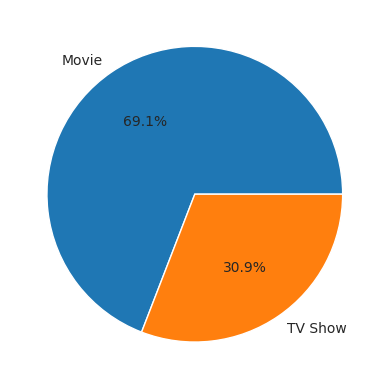

In [ ]:
plt.pie(df["type"].value_counts(),labels=df["type"].value_counts().index,autopct='%1.1f%%')
plt.show()

content added over time?

<Figure size 1400x800 with 0 Axes>

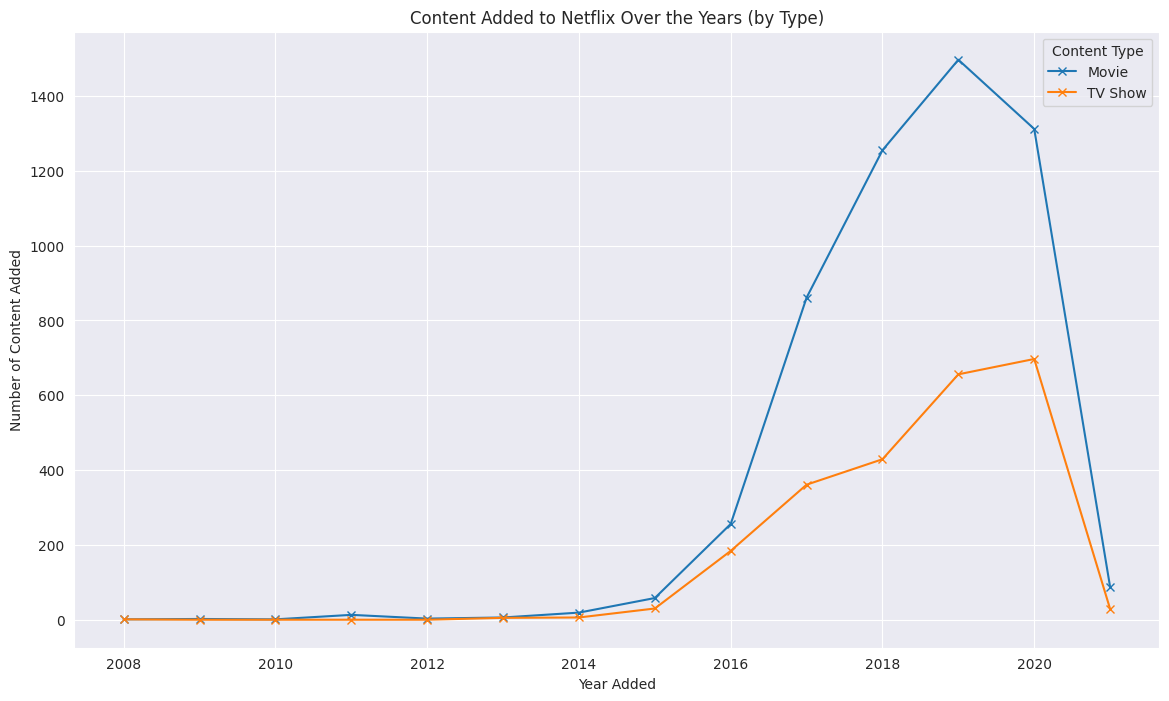

In [ ]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='x', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Content Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

most popular genre?

In [ ]:
df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


In [ ]:
genres=df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [ ]:
genres['genre'].value_counts()

,count
genre,
International Movies,2323
Dramas,1383
Comedies,1074
Documentaries,751
Dramas,722
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
Sports Movies,1


In [ ]:
top15genres=genres['genre'].value_counts().reset_index()
top15genres.columns=['genre','count']
top15genres=top15genres.head(15)
top15genres

,genre,count
0,International Movies,2323
1,Dramas,1383
2,Comedies,1074
3,Documentaries,751
4,Dramas,722
5,Action & Adventure,721
6,International TV Shows,689
7,Independent Movies,653
8,TV Dramas,641
9,Romantic Movies,528


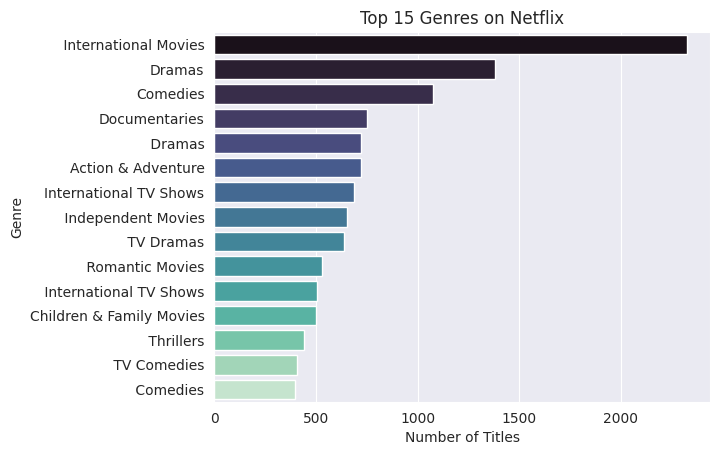

In [ ]:
sns.barplot(y='genre',x='count',data=top15genres,palette='mako',hue='genre',legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

Distribution of content duration?

In [ ]:
movies_df=df[df['type']=='Movie'].copy()
tvshow_df=df[df['type']=='TV Show'].copy()

In [ ]:
movies_df['duration']=movies_df['duration'].str.replace(' min','').astype(int)
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6


In [ ]:
tvshow_df['seasons'] = tvshow_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)
tvshow_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,1
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,1
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1


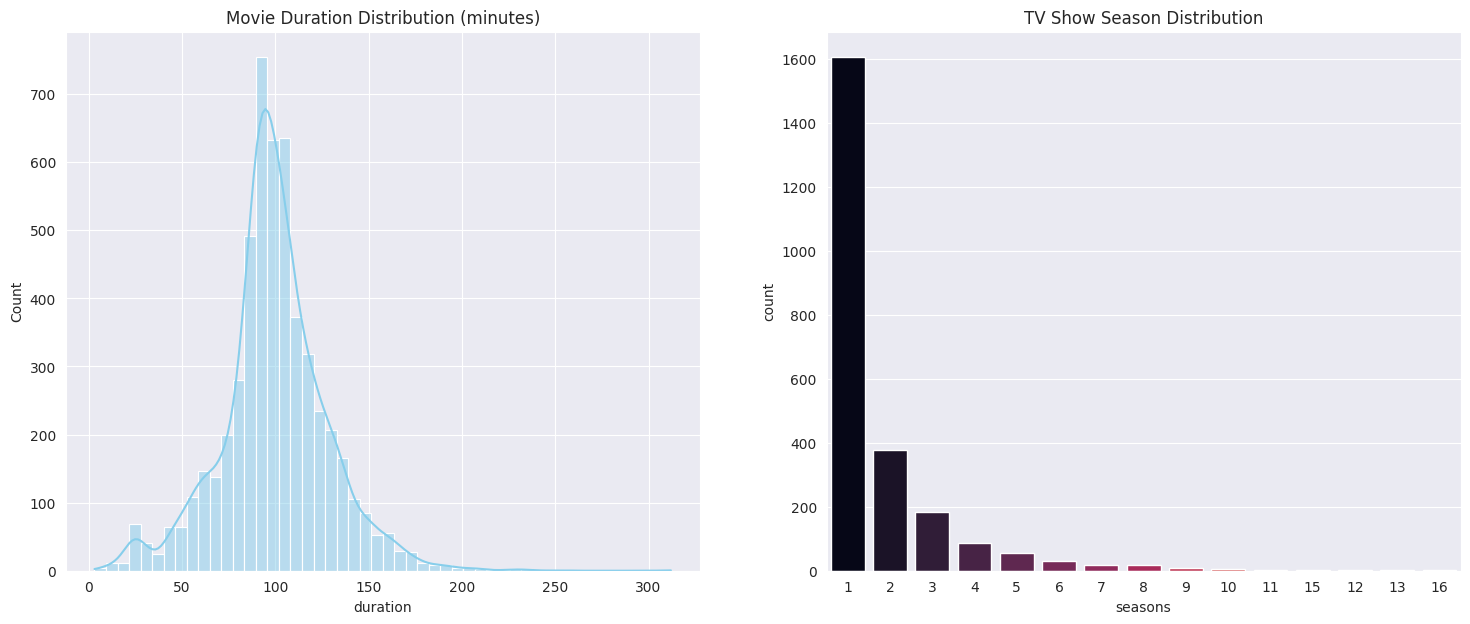

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tvshow_df, palette='rocket', order=tvshow_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

content is from?

In [ ]:
df['country'].value_counts()

,count
country,
United States,3051
India,923
United Kingdom,396
Japan,224
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [ ]:
countries=df.assign(country=df['country'].str.split(',')).explode('country')
countries['country'].value_counts()

,count
country,
United States,3379
India,956
United Kingdom,576
United States,414
Canada,259
...,...
Namibia,1
Uganda,1
East Germany,1


In [ ]:
topcountry=countries['country'].value_counts().reset_index()
topcountry.columns=['country','count']
topcountry=topcountry.head(15)
topcountry

,country,count
0,United States,3379
1,India,956
2,United Kingdom,576
3,United States,414
4,Canada,259
5,Japan,235
6,France,196
7,South Korea,194
8,Spain,168
9,France,153


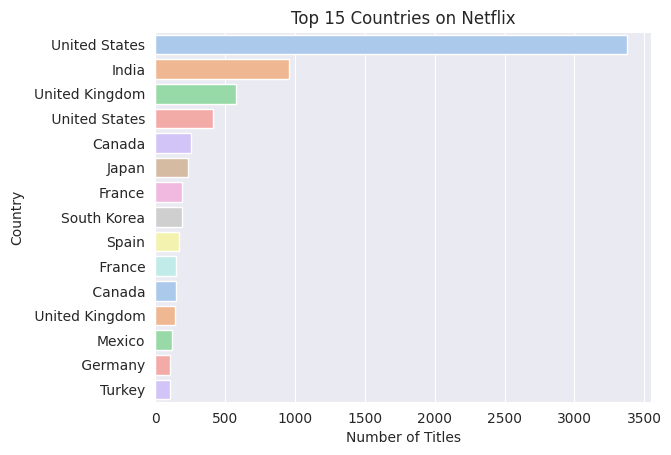

In [ ]:
sns.barplot(y='country',x='count',data=topcountry,palette='pastel',hue='country',legend=False)
plt.title('Top 15 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

maturity rating?

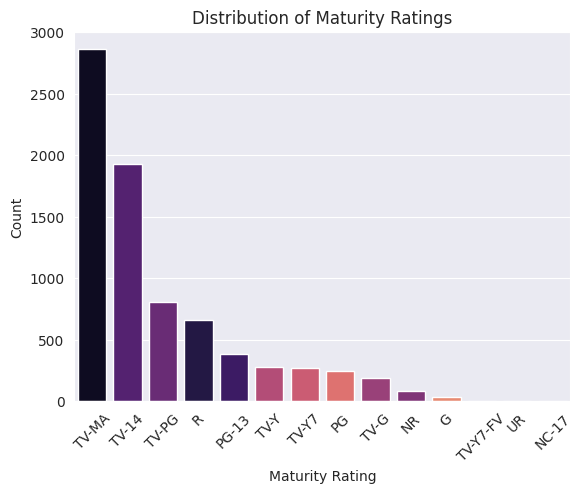

In [ ]:
sns.countplot(x='rating',data=df,palette='magma',order=df['rating'].value_counts().index,hue='rating',legend=False)
plt.title('Distribution of Maturity Ratings')
plt.xlabel('Maturity Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###Step 5:
##Feature Engineering-Content Freshness

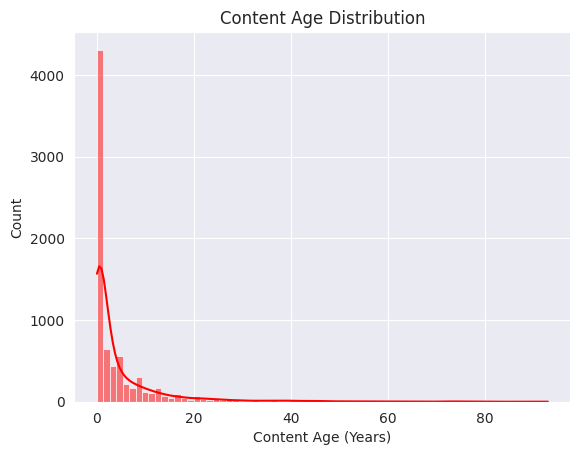

In [ ]:
df['stale']=df['year_added']-df['release_year']
content_age=df[df['stale']>=0]

sns.histplot(data=content_age,x='stale',bins=70,kde=True,color='red').set_title('Content Age Distribution')
plt.xlabel('Content Age (Years)')
plt.ylabel('Count')
plt.show()

###Step 6:
##Deeper Multivariate Analysis

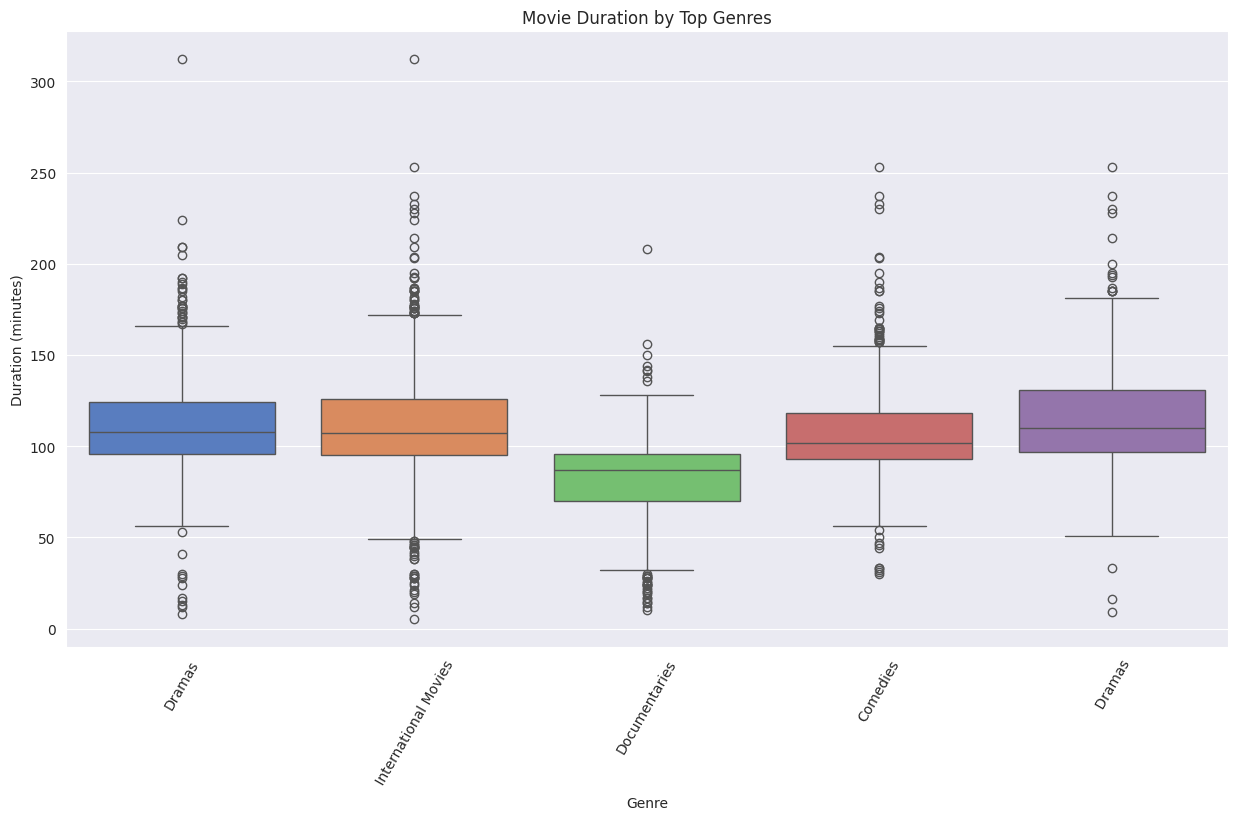

In [ ]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='muted', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=60)
plt.show()

###Step 7:
##Word Cloud from Content Descriptions

In [ ]:
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


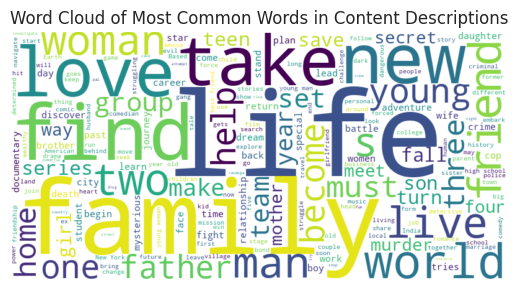

In [ ]:
text=" ".join(df['description'])
wordcloud=WordCloud(background_color='white',width=800,height=400).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Content Descriptions')
plt.show()

###Step 8:
##Key Insights

1. Netlix was movie heavy 2 years ago and had fewer
2. US was the top content producer
3. Content was skewed towards mature audience
4. Drama and Comedy was the most popular genre.
5. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
6. Themes revolved around human relationships.

###Change in distribution of content ratings over time

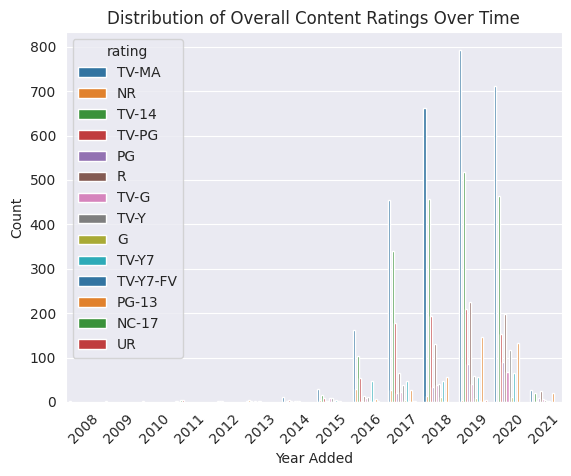

In [ ]:
#For movies and TV Shows both
sns.countplot(data=df,x='year_added',hue='rating',order=sorted(df['year_added'].dropna().unique()),palette='tab10')
plt.title('Distribution of Overall Content Ratings Over Time')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

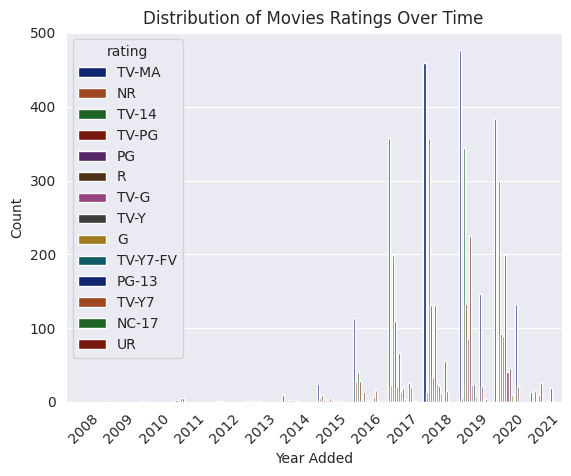

In [ ]:
#For movies
sns.countplot(data=movies_df,x='year_added',hue='rating',order=sorted(df['year_added'].dropna().unique()),palette='dark')
plt.title('Distribution of Movies Ratings Over Time')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

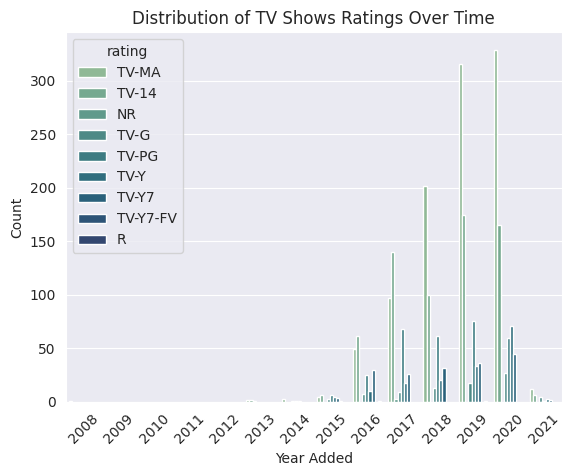

In [ ]:
#For TV Shows
sns.countplot(data=tvshow_df,x='year_added',hue='rating',order=sorted(df['year_added'].dropna().unique()),palette='crest')
plt.title('Distribution of TV Shows Ratings Over Time')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

##Insights:


* Overall Content

1. Big surge in content growth from 2017–2020, then a slight dip post-2020.

2. Dominated by TV-MA, followed by TV-14 and TV-PG; Shift toward mature audiences.


* Movies

1. Most movies added between 2017–2019, drop after 2020.


2. Mostly TV-MA and R, fewer PG and G; Adult content clearly favored.


* TV Shows

1. Peak content addition around 2018–2020, similar post-2020 decline.


2. Heavily TV-MA, TV-14, and TV-PG; Focus on mature and teen-oriented series.

###The relationship between content age and its type (Movie vs. TV Show)?

In [ ]:
content_age.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,stale
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0


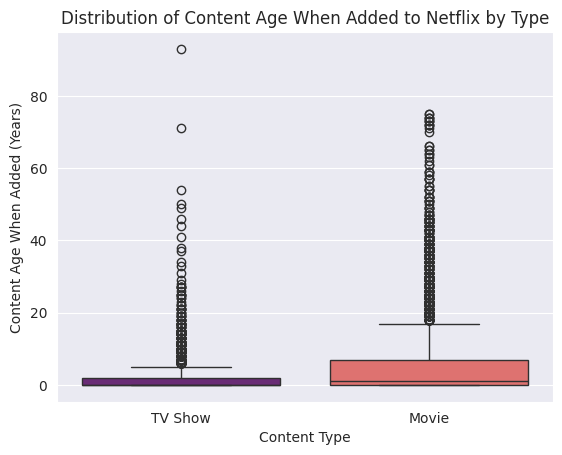

In [ ]:
sns.boxplot(data=content_age, x='type', y='stale', hue='type', palette='magma')
plt.title('Distribution of Content Age When Added to Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age When Added (Years)')
plt.show()

##Insights


* TV Shows are typically added to Netflix when they are relatively new, that is they typically tend to be between the age 0 to 5 years.

* Movies added to Netflix can be both new and older, typically tending to be between 0 to 10 years.

###Identifying any trends in content production based on the release year vs. the year added to Netflix

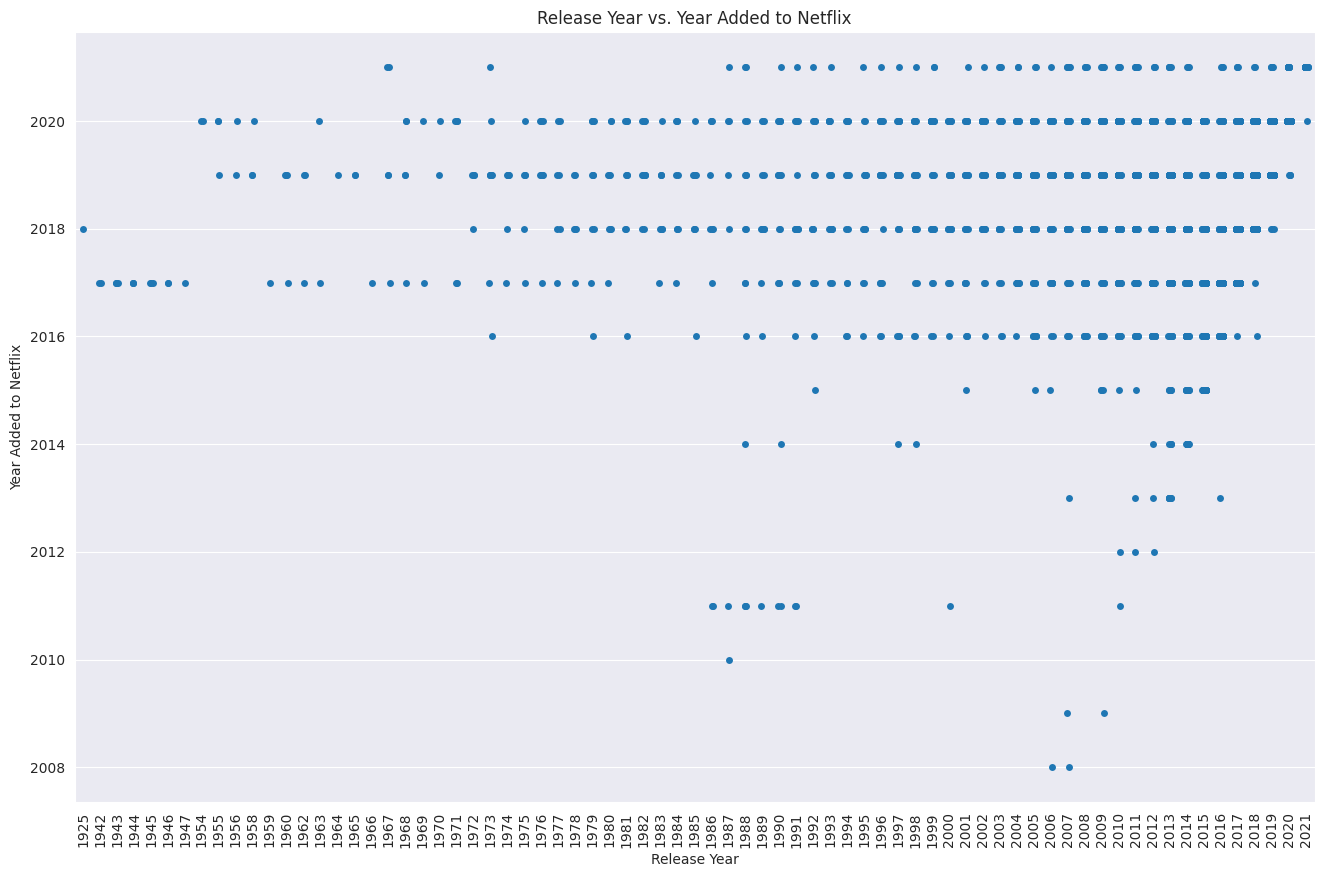

In [ ]:
plt.figure(figsize=(16, 10))
sns.stripplot(data=df, x='release_year', y='year_added')
plt.xlabel('Release Year')
plt.xticks(rotation=90)
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix')
plt.show()

##Insights


*   Most years netflix added shows and movies that were recently and correspondingly released.

*   Netflix added more older shows between the years 2018 and 2020.

*   The collections of movies had a significant growth after 2014.





###Most common word pairs or phrases in content descriptions

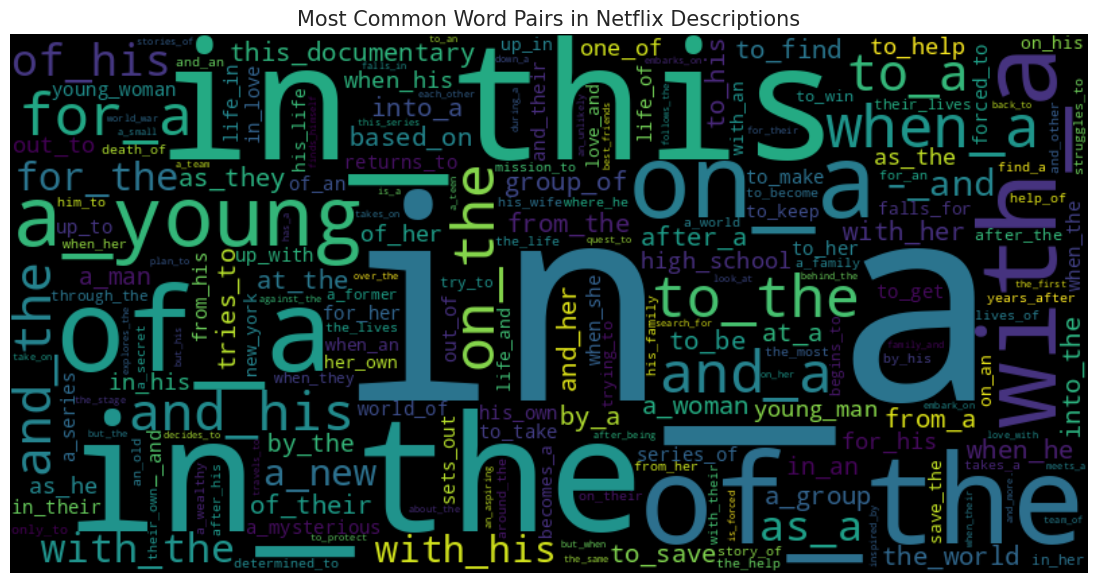

In [ ]:
from collections import Counter

all_words = ' '.join(df['description'].dropna()).lower().split()
bigrams = ['_'.join([all_words[i], all_words[i+1]]) for i in range(len(all_words)-1)]
bigram_counts = Counter(bigrams)

bigram_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=15)
plt.show()

##Insights


*   Prepositions, Conjuctions and Articles are the most repeated words.

*   Precisely: in_a, in_the, in_thus, of_a, a_young, etc.

* These do not give us any informational insight on the data.

###The top directors on Netflix

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,stale
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [ ]:
top_directors = (df[df['director'] != 'Unknown']['director'].value_counts().head(50).reset_index())
top_directors.columns = ['director', 'Number of Titles']
top_directors


,director,Number of Titles
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Jay Chapman,12
6,Youssef Chahine,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Lance Bangs,8


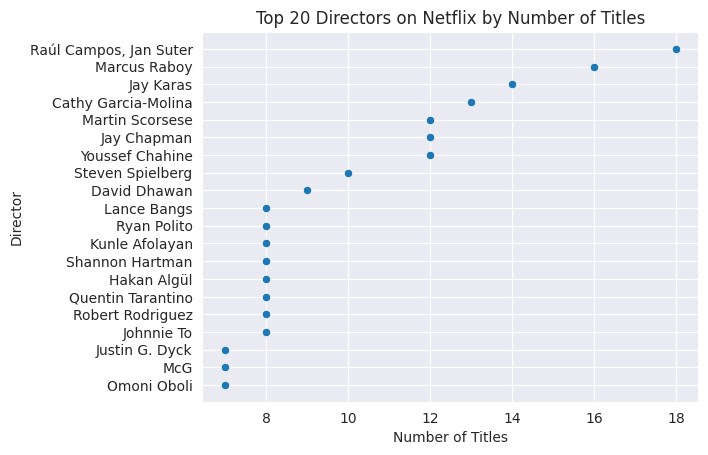

In [ ]:
sns.scatterplot(y='director', x='Number of Titles', data=top_directors.head(20))
plt.title('Top 20 Directors on Netflix by Number of Titles')
plt.ylabel('Director')
plt.show()

##Insight


* Very few directors in top 20 Directors directed less than 8 Movies or TV Shows.

* A substantial amount of Directors had done exactly 8 Movies or TV Shows.

* Most of them directed more than 8 Movies or TV Shows